# **Setup**

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

## Load train dataset

In [2]:
training = pd.read_csv("training.csv")

# **Preprocess the dataset**

## Replace all '?' by NaN and drop rows containing the latter

In [3]:
for data in training:
    training[data].replace(' ?', np.nan, inplace=True)
    
nulos = training.isnull().any(axis=1).sum()
total, _ = training.shape
print(f"Percentage of NaN values in the dataset -> {round(nulos/total * 100, 2)}")

training.dropna(inplace=True)

Percentage of NaN values in the dataset -> 7.37


## Remove unnecessary columns

In [4]:
training = training.drop("education", 1)

# **Visualize data**

## Peak dataset

In [5]:
training.head(20)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Numerical data

In [6]:
numeric_keys_all = training.describe().keys()
numeric_keys = set(numeric_keys_all) - set(['education-num'])
training[numeric_keys].describe()

,capital-gain,capital-loss,age,fnlwgt,hours-per-week
count,30162.000000,30162.000000,30162.000000,3.016200e+04,30162.000000
mean,1092.007858,88.372489,38.437902,1.897938e+05,40.931238
std,7406.346497,404.298370,13.134665,1.056530e+05,11.979984
min,0.000000,0.000000,17.000000,1.376900e+04,1.000000
25%,0.000000,0.000000,28.000000,1.176272e+05,40.000000
50%,0.000000,0.000000,37.000000,1.784250e+05,40.000000
75%,0.000000,0.000000,47.000000,2.376285e+05,45.000000
max,99999.000000,4356.000000,90.000000,1.484705e+06,99.000000


## Categorical data

In [7]:
for key in set(training.keys()) - set(numeric_keys_all):
    table = training[key].value_counts()
    table.to_latex(buf=f"tables/{key}.tex")
    print(table)
    print()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

# Turning non-numerical values into numerical

In [8]:
def occupation_discretizer(x):
    if re.search('managerial', x):
        return 'Highskill'
    elif re.search('specialty',x):
        return 'Highskill'
    else:
        return 'Lowskill'
    
training['occupation']=training.occupation.apply(lambda x: x.strip()).apply(lambda x: occupation_discretizer(x))

In [9]:
def discretizer(data, var, bins, group_names):
    bin_value = bins
    group = group_names
    data[var] = pd.cut(training[var], bin_value, labels=group)

In [10]:
discretizer(training, 'hours-per-week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])

In [11]:
discretizer(training, 'age', [17,30,55,100], ['Young', 'Middle_aged', 'Old'])

In [12]:
training['marital-status']=training['marital-status'].apply(lambda x: 'Married' if x.startswith('Married',1) else 'Single')

In [13]:
pd.crosstab(training['occupation'], training['salary-classification'])

salary-classification,<=50K,>50K
occupation,,
Highskill,4282,3748
Lowskill,18372,3760


In [22]:
training['race']=training['race'].apply(lambda x: 'White' if x==' White' else 'Other')

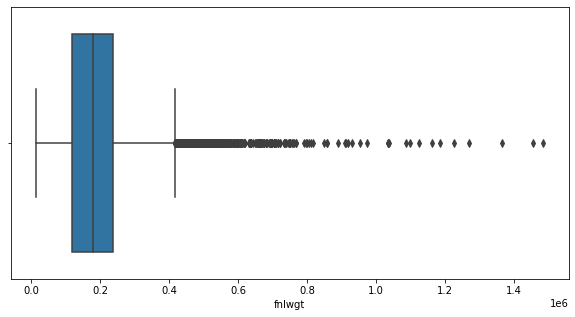

<Figure size 432x288 with 0 Axes>

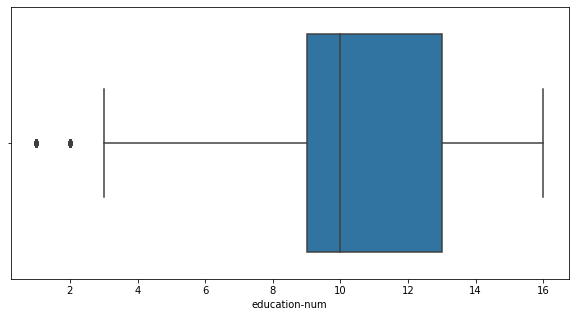

<Figure size 432x288 with 0 Axes>

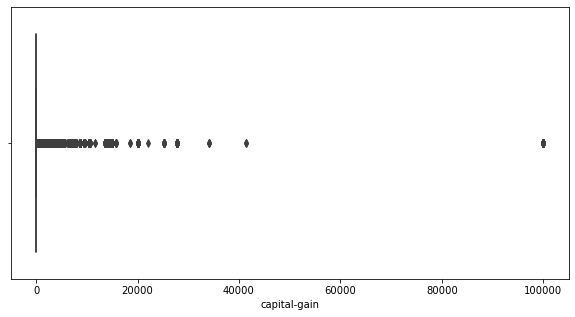

<Figure size 432x288 with 0 Axes>

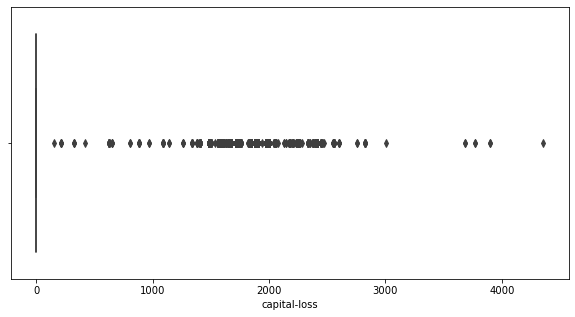

<Figure size 432x288 with 0 Axes>

In [15]:
for key in training.describe().keys():
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(x=training[key])
    plt.show()
    plt.savefig(f'images/{key}-box.png')

In [16]:
def workclass_discretizer(x):
    if re.search('Private', x):
        return 'Private'
    elif re.search('Self', x):
        return 'selfempl'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'others'
    
training['workclass']=training.workclass.apply(lambda x: x.strip()).apply(lambda x: workclass_discretizer(x))

In [17]:
training['native-country']=training['native-country'].apply(lambda x: 'Native' if x==' United-States' else 'Imigrant')

In [18]:
encoding = {"age": {"Young": 0, "Middle_aged": 1, "Old": 2},
            "hours-per-week": {"Low": 0, "Medium": 1, "High": 2, "VeryHigh": 3},
            "marital-status": {"Married": 0, "Single": 1},
            "race": {"White": 0, "Other": 1},
            "occupation": {"Lowskill": 0, "Highskill": 1},
            "sex": {" Male": 0, " Female": 1},
            "native-country": {"Native": 0, "Imigrant":1}}

training = training.replace(encoding)

training = pd.get_dummies(training, columns=['workclass','relationship'])

training.head()

,age,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,...,workclass_Private,workclass_gov,workclass_others,workclass_selfempl,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,1.0,77516,13,1,0,0,0,2174,0,1,...,0,1,0,0,0,1,0,0,0,0
1,1.0,83311,13,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1.0,215646,9,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,1.0,234721,7,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,0.0,338409,13,0,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


# Get summary of dataframe

In [19]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           29834 non-null  float64
 1   fnlwgt                        30162 non-null  int64  
 2   education-num                 30162 non-null  int64  
 3   marital-status                30162 non-null  int64  
 4   occupation                    30162 non-null  int64  
 5   race                          30162 non-null  int64  
 6   sex                           30162 non-null  int64  
 7   capital-gain                  30162 non-null  int64  
 8   capital-loss                  30162 non-null  int64  
 9   hours-per-week                30162 non-null  int64  
 10  native-country                30162 non-null  int64  
 11  salary-classification         30162 non-null  object 
 12  workclass_Private             30162 non-null  uint8  
 13  w

# Get descriptive statistics

# Exploratory Data Analysis

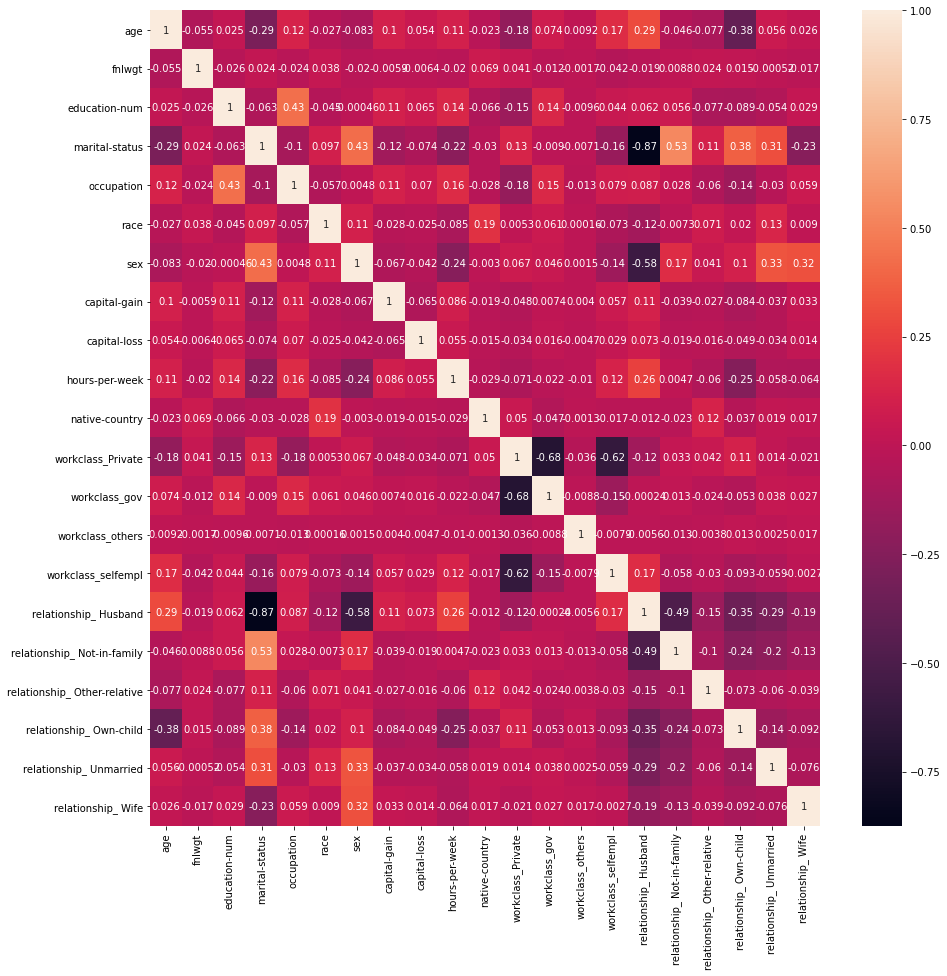

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
heat_map = sns.heatmap(training.corr(method='kendall'), annot=True,ax=ax)
heat_map.get_figure().savefig('images/heatmap.png')

In [21]:
sns.set_style('whitegrid')
ax = sns.countplot(x='salary-classification',hue='workclass',data=training.loc[training['salary-classification'] == 0])
ax.get_figure().savefig('images/salary0work.png')

ValueError: Could not interpret input 'workclass'

In [ ]:
sns.set_style('whitegrid')
ax = sns.countplot(x='salary-classification',hue='workclass',data=training.loc[training['salary-classification'] == 1])
ax.get_figure().savefig('images/salary1work.png')

In [ ]:
salary0education = sns.countplot(y='salary-classification',hue='education-num',data=training.loc[training['salary-classification'] == 0])
salary0education.get_figure().savefig('images/salary0education.png')

In [ ]:
salary1education = sns.countplot(y='salary-classification',hue='education-num',data=training.loc[training['salary-classification'] == 1])
salary1education.get_figure().savefig('images/salary1education.png')

In [ ]:
agehours = sns.scatterplot(data=training, x="age", y="hours-per-week", hue="salary-classification")
agehours.get_figure().savefig('images/agehours.png')